In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib


# Assuming the data is space-delimited
data = pd.read_csv('EXC_eta_01_P_002_del_04.dat', names=['sig', 'gsyn', 'misc1', 'misc2', 'misc3', 'misc4'], delim_whitespace=True)
data_sorted = data.drop_duplicates().sort_values(by="sig")
data_sorted

,sig,gsyn,misc1,misc2,misc3,misc4
123,-0.003392,0.000858,0.000858,1,1,0
122,0.006607,0.000858,0.000858,1,1,0
121,0.016582,0.000859,0.000859,1,1,0
120,0.026494,0.000861,0.000861,1,1,0
119,0.036308,0.000864,0.000864,1,1,0
...,...,...,...,...,...,...
108,0.968634,0.003069,0.003069,1,1,0
109,0.978235,0.003084,0.003084,1,1,0
110,0.987842,0.003099,0.003099,1,1,0
111,0.997454,0.003114,0.003114,1,1,0


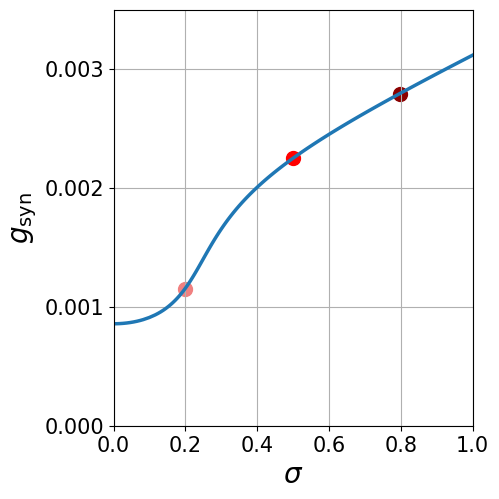

In [7]:
# Plot the data
plt.figure(figsize=(5, 5))

# Highlight specific points
x_points = [0.2, 0.5, 0.8]
colors = ['lightcoral', 'red', 'darkred']

for x, color in zip(x_points, colors):
    point = data_sorted.iloc[(data_sorted['sig'] - x).abs().argsort()[:1]]
    plt.scatter(point['sig'], point['gsyn'], color=color, s=100, alpha=1)

# plot curve 
plt.plot(data_sorted['sig'], data_sorted['gsyn'], linestyle='-', linewidth=2.5)


plt.xlabel(r'$\sigma$', fontsize=20)  # Use raw string for LaTeX
plt.ylabel(r'$g_{\text{syn}}$', fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 0.0035)
plt.yticks([0, 0.001, 0.002, 0.003])
plt.grid(True)
matplotlib.rcParams.update({'font.size': 15})
plt.tight_layout(pad=0.5)
save_path = os.path.join('..', '..', '..', 'paper', 'cumulant', 'bifurcation.png')
plt.savefig(save_path, format='png', dpi=600)

plt.show()

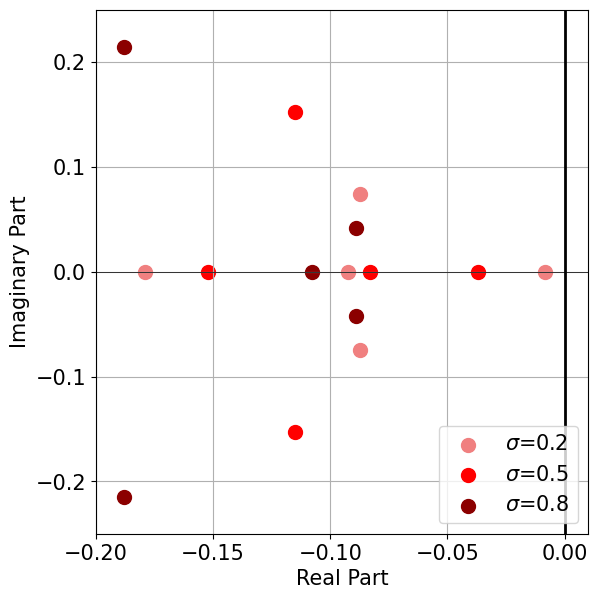

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the eigenvalues as complex numbers
eigenvalues_1 = np.array([-0.179200+0.000000j, -0.008209+0.000000j, -0.092365+0.000000j,
                          -0.087329+0.074206j, -0.087329-0.074206j])
eigenvalues_2 = np.array([-0.036930+0.000000j, -0.152333+0.000000j, -0.083146+0.000000j,
                          -0.115143+0.152514j, -0.115143-0.152514j])
eigenvalues_3 = np.array([-0.089230+0.041846j, -0.089230-0.041846j, -0.107617+0.000000j,
                          -0.188054+0.214890j, -0.188054-0.214890j])

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(eigenvalues_1.real, eigenvalues_1.imag, s=100, color='lightcoral', label=r'$\sigma$=0.2')
ax.scatter(eigenvalues_2.real, eigenvalues_2.imag, s=100, color='red', label=r'$\sigma$=0.5')
ax.scatter(eigenvalues_3.real, eigenvalues_3.imag, s=100, color='darkred', label=r'$\sigma$=0.8')

# add vline
ax.axvline(0, color='black',linewidth=2)

# Label the axes
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_xlim(-0.2, 0.01)
ax.set_ylim(-0.25, 0.25)
# ax.set_title('Eigenvalues on the Complex Plane')
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True)
ax.legend(loc='lower right')

matplotlib.rcParams.update({'font.size': 15})
plt.tight_layout(pad=0.5)
save_path = os.path.join('..', '..', '..', 'paper', 'cumulant', 'complex_plane.png')
plt.savefig(save_path, format='png', dpi=600)

# Show the plot
plt.show()
